# 피드 포워드 신경망 언어 모델: Neural Network Language Model, NNLM

## 1. 기존 N-gram 언어 모델의 한계
- 언어 모델은 문장에 확률을 할당하는 모델
- 언어 모델링은 주어진 문맥으로부터 아직 모르는 단어를 예측하는 것
- N-gram 모델을 배웠으나 희소 문제(sparsity problem)가 있었습니다.

## 2. 단어의 의미적 유사성
- 희소 문제는 기계가 단어의 의미적 유사성을 알수 있다면 해결할 수 있는 문제입니다.
- 만약 언어 모델 또한 단어의 의미적 유사성을 학습할 수 있도록 설계한다면, 훈련 코퍼스에 없는 단어 시퀀스에 대한 예측이라도 유사한 단어가 사용된 단어 시퀀스를 참고하여 보다 정확한 예측을 할 수 있습니다.
- 이러한 아이디어를 반영한 언어 모델이 신경망 언어 모델 NNLM입니다.
- 그리고 이 아이디어는 단어 벡터 간 유사도를 구할 수 있는 벡터를 얻어내는 워드 임베딩(word embedding)의 아이디어입니다.

## 3. 피드 포워드 신경망 언어 모델: NNLM
- 윈도우의 크기가 n=4인 NNLM의 구조:

    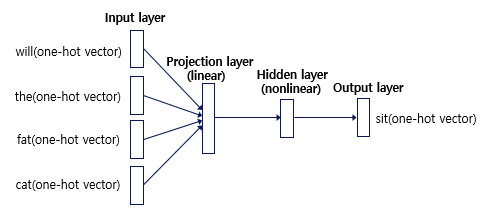
- 투사층의 크기가 M이면, 각 입력 단어들은 투사층에서 V x M 크기의 가중치 행렬과 곱해집니다.

    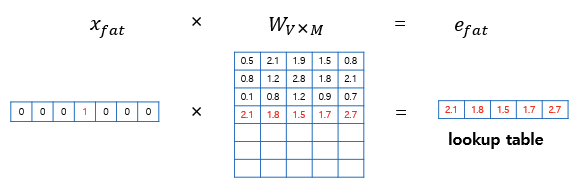
- M차원의 벡터로 맵핑된 벡터들은 초기에 랜던한 값을 가지지만 학습과정에서 값이 계속 변경되는데 이 단어 벡터를 임베딩 벡터(embedding vector)라고 합니다.

    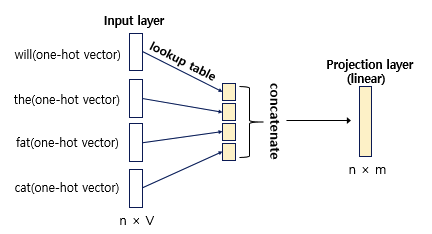
- 각 단어가 테이블 룩업을 통해 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값을 연결(concatenate)됩니다.
- x를 각 단어의 원-핫 벡터, NNLM이 예측하고자 하는 단어가 문장에서 t번째 단어라고 하고, 윈도우의 크기를 n, 룩업 테이블을 의미하는 함수를 lookup, 세미콜론(;)을 연결 기호로 하였을 때 투사층을 식으로 표현하면 아래와 같습니다.

    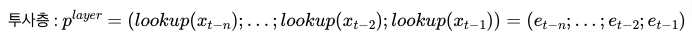
- 가중치와 편향이 W_h와 b_h이고, 은닉층의 활성화 함수를 하이퍼볼릭탄젠트 함수라고 하였을 때, 은닉층을 식으로 표현하면 아래와 같습니다.

    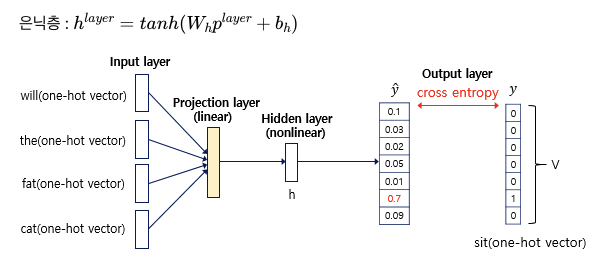
- NNLM의 예측값이라는 의미에서 y_hat이라고 하면, 출력층을 식으로 표현하면 아래와 같습니다.

    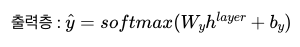
- NNLM의 핵심은 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습한다면 결과적으로 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻게되는 것에 있습니다. 
- 이렇게 되면 훈련이 끝난 후 다음 단어를 예측 과정에서 (마치 앞서 언급한 저자의 '톺아보기'와 같은 예시처럼) 훈련 코퍼스에서 없던 단어 시퀀스라 하더라도 다음 단어를 선택할 수 있습니다.
- 이는 Word2Vec, FastText, GloVe 등으로 발전되어서 NLP에서 필수적으로 사용되는 방법이 되었습니다.

## 4. NNLM의 이점과 한계
### 1. 기존 모델에서의 개선점
- NNLM은 단어를 표현하기 위해 임베딩 벡터를 사용하므로서 단어의 유사도를 계산할 수 있었습니다. 그리고 이를 통해 희소 문제(sparsity problem)를 해결하였습니다.
### 2. 고정된 길이의 입력: Fixed-length input
- NNLM은 n-gram 언어 모델과 마찬가지로 다음 단어를 예측하기 위해 모든 이전 단어를 참고하는 것이 아니라 정해진 n개의 단어만을 참고할 수 있습니다. 
- 이 한계를 극복할 수 있는 모델로, RNN 언어 모델(RNNLM)이 있습니다.